# Test file

This example will function as a test to check if we made the installation
correctly.

## Import libraries

First of all we import the libraries we're gonna use.

In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Read the data

To read the data we're gonna use ``pandas`` and an utility from the library
``os``.

In [2]:
df = pd.read_csv(os.path.join("../in/fifa.csv"))

Now we select one columns. The result will be an object from the ``pandas`` library a ``series`` object. Thi object can be converted to a more standard ``numpy`` array.

In [3]:
nom = df["Name"]
nom

0                  L. Messi
1         Cristiano Ronaldo
2                 Neymar Jr
3                    De Gea
4              K. De Bruyne
                ...        
18202          J. Lundstram
18203    N. Christoffersson
18204             B. Worman
18205        D. Walker-Rice
18206             G. Nugent
Name: Name, Length: 18207, dtype: object

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.drop(df.iloc[:, 28:54], inplace = True, axis = 1) 

In [6]:
del df['Photo']
del df['Flag']
del df['Club Logo']
del df['Body Type']
del df['Real Face']
del df['Jersey Number']
del df['Work Rate']
del df['Joined']
del df['Contract Valid Until']
del df['Loaned From']
del df['Unnamed: 0']
del df['ID']

df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
df[df.isna().any(axis=1)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,J. Rodríguez,26,Colombia,88,89,FC Bayern München,€69.5M,€315K,2171,Left,4.0,3.0,4.0,LAM,5'11,172lbs,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,G. Higuaín,30,Argentina,88,88,Milan,€57M,€245K,1965,Right,4.0,4.0,3.0,LS,6'1,196lbs,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0,69.0,86.0,79.0,70.0,85.0,80.0,50.0,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,€37M,€235K,2245,Right,3.0,3.0,3.0,LDM,6'0,157lbs,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0,66.0,83.0,90.0,92.0,81.0,80.0,81.0,81.0,84.0,78.0,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,€36.5M,€18K,2142,Left,2.0,4.0,4.0,CAM,6'3,176lbs,78.0,80.0,77.0,81.0,76.0,82.0,86.0,87.0,79.0,84.0,77.0,76.0,76.0,79.0,65.0,84.0,58.0,76.0,72.0,88.0,67.0,58.0,86.0,81.0,71.0,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,M. Kovačić,24,Croatia,83,89,Chelsea,€35M,€165K,2115,Right,3.0,4.0,4.0,LCM,5'9,172lbs,73.0,62.0,42.0,87.0,76.0,88.0,78.0,68.0,82.0,89.0,84.0,74.0,81.0,70.0,85.0,79.0,63.0,82.0,65.0,75.0,77.0,78.0,69.0,88.0,59.0,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,Zhang Yuan,21,China PR,51,60,Guizhou Hengfeng FC,€60K,€2K,1459,Right,1.0,2.0,2.0,CM,6'0,172lbs,36.0,30.0,48.0,57.0,32.0,45.0,37.0,38.0,55.0,50.0,71.0,76.0,75.0,55.0,58.0,55.0,60.0,62.0,61.0,33.0,58.0,41.0,53.0,47.0,36.0,43.0,47.0,41.0,46.0,12.0,12.0,10.0,13.0,9.0,NaN
18026,Chen Ji,21,China PR,50,59,Guizhou Hengfeng FC,€50K,€2K,1440,Right,1.0,2.0,2.0,LM,5'10,143lbs,41.0,28.0,50.0,54.0,26.0,50.0,39.0,40.0,55.0,46.0,61.0,77.0,76.0,50.0,74.0,47.0,63.0,50.0,52.0,29.0,56.0,50.0,37.0,49.0,42.0,38.0,46.0,48.0,51.0,15.0,8.0,10.0,13.0,7.0,NaN
18031,Zhou Xin,20,China PR,50,61,Stabæk Fotball,€40K,€2K,1278,Right,1.0,3.0,2.0,RB,5'7,143lbs,46.0,29.0,35.0,32.0,26.0,52.0,32.0,28.0,22.0,34.0,60.0,58.0,57.0,47.0,85.0,29.0,64.0,64.0,32.0,29.0,54.0,54.0,43.0,38.0,38.0,32.0,51.0,48.0,48.0,11.0,7.0,9.0,10.0,6.0,NaN
18056,L. Valeau,19,Italy,50,65,Ascoli,€60K,€3K,1450,Left,1.0,3.0,2.0,CM,5'10,143lbs,50.0,30.0,50.0,54.0,40.0,50.0,40.0,40.0,50.0,50.0,62.0,63.0,60.0,52.0,65.0,50.0,64.0,52.0,54.0,40.0,60.0,49.0,26.0,49.0,40.0,42.0,41.0,54.0,55.0,8.0,11.0,13.0,14.0,14.0,NaN


In [8]:
df.loc[df.Club != df.Club]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,L. Paredes,24,Argentina,80,85,NaN,€0,€0,2122,Right,2.0,4.0,4.0,CM,5'11,165lbs,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
538,A. Granqvist,33,Sweden,80,80,NaN,€0,€0,1797,Right,2.0,4.0,2.0,LCB,6'4,185lbs,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
568,A. Lunev,26,Russia,79,81,NaN,€0,€0,1217,Right,1.0,3.0,1.0,GK,6'2,176lbs,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
677,I. Smolnikov,29,Russia,79,79,NaN,€0,€0,2038,Right,2.0,3.0,3.0,RB,5'10,154lbs,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
874,A. Dzyuba,29,Russia,78,78,NaN,€0,€0,1810,Right,2.0,3.0,3.0,ST,6'5,201lbs,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,V. Kaith,21,India,55,64,NaN,€0,€0,838,Right,1.0,2.0,1.0,GK,6'2,176lbs,13.0,7.0,13.0,16.0,7.0,11.0,10.0,13.0,16.0,18.0,29.0,32.0,24.0,55.0,36.0,24.0,47.0,16.0,56.0,9.0,21.0,10.0,8.0,29.0,13.0,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0,NaN
17215,K. Taimi,26,Finland,55,57,NaN,€0,€0,1366,Right,1.0,3.0,2.0,RB,6'4,187lbs,42.0,41.0,65.0,45.0,26.0,50.0,30.0,32.0,35.0,40.0,65.0,55.0,58.0,49.0,42.0,29.0,61.0,56.0,76.0,26.0,48.0,54.0,46.0,36.0,33.0,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0,NaN
17339,S. Passi,23,India,54,63,NaN,€0,€0,1321,Right,1.0,3.0,2.0,NaN,5'9,143lbs,35.0,56.0,49.0,38.0,38.0,53.0,37.0,33.0,33.0,43.0,66.0,68.0,57.0,49.0,58.0,50.0,55.0,59.0,62.0,47.0,39.0,34.0,57.0,43.0,58.0,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0,NaN
17436,D. Lalhlimpuia,20,India,54,67,NaN,€0,€0,1270,Right,1.0,3.0,2.0,NaN,6'0,168lbs,25.0,65.0,48.0,38.0,48.0,47.0,33.0,30.0,31.0,52.0,53.0,58.0,59.0,51.0,59.0,51.0,65.0,50.0,58.0,50.0,33.0,18.0,48.0,40.0,55.0,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0,NaN


In [9]:
df = df.dropna(subset = ['Club'])

In [10]:
df.columns[df.isna().any()].tolist()

['Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Position',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause']

In [11]:
df[df.isna().any(axis=1)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,J. Rodríguez,26,Colombia,88,89,FC Bayern München,€69.5M,€315K,2171,Left,4.0,3.0,4.0,LAM,5'11,172lbs,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,G. Higuaín,30,Argentina,88,88,Milan,€57M,€245K,1965,Right,4.0,4.0,3.0,LS,6'1,196lbs,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0,69.0,86.0,79.0,70.0,85.0,80.0,50.0,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,€37M,€235K,2245,Right,3.0,3.0,3.0,LDM,6'0,157lbs,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0,66.0,83.0,90.0,92.0,81.0,80.0,81.0,81.0,84.0,78.0,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,€36.5M,€18K,2142,Left,2.0,4.0,4.0,CAM,6'3,176lbs,78.0,80.0,77.0,81.0,76.0,82.0,86.0,87.0,79.0,84.0,77.0,76.0,76.0,79.0,65.0,84.0,58.0,76.0,72.0,88.0,67.0,58.0,86.0,81.0,71.0,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,M. Kovačić,24,Croatia,83,89,Chelsea,€35M,€165K,2115,Right,3.0,4.0,4.0,LCM,5'9,172lbs,73.0,62.0,42.0,87.0,76.0,88.0,78.0,68.0,82.0,89.0,84.0,74.0,81.0,70.0,85.0,79.0,63.0,82.0,65.0,75.0,77.0,78.0,69.0,88.0,59.0,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,Zhang Yuan,21,China PR,51,60,Guizhou Hengfeng FC,€60K,€2K,1459,Right,1.0,2.0,2.0,CM,6'0,172lbs,36.0,30.0,48.0,57.0,32.0,45.0,37.0,38.0,55.0,50.0,71.0,76.0,75.0,55.0,58.0,55.0,60.0,62.0,61.0,33.0,58.0,41.0,53.0,47.0,36.0,43.0,47.0,41.0,46.0,12.0,12.0,10.0,13.0,9.0,NaN
18026,Chen Ji,21,China PR,50,59,Guizhou Hengfeng FC,€50K,€2K,1440,Right,1.0,2.0,2.0,LM,5'10,143lbs,41.0,28.0,50.0,54.0,26.0,50.0,39.0,40.0,55.0,46.0,61.0,77.0,76.0,50.0,74.0,47.0,63.0,50.0,52.0,29.0,56.0,50.0,37.0,49.0,42.0,38.0,46.0,48.0,51.0,15.0,8.0,10.0,13.0,7.0,NaN
18031,Zhou Xin,20,China PR,50,61,Stabæk Fotball,€40K,€2K,1278,Right,1.0,3.0,2.0,RB,5'7,143lbs,46.0,29.0,35.0,32.0,26.0,52.0,32.0,28.0,22.0,34.0,60.0,58.0,57.0,47.0,85.0,29.0,64.0,64.0,32.0,29.0,54.0,54.0,43.0,38.0,38.0,32.0,51.0,48.0,48.0,11.0,7.0,9.0,10.0,6.0,NaN
18056,L. Valeau,19,Italy,50,65,Ascoli,€60K,€3K,1450,Left,1.0,3.0,2.0,CM,5'10,143lbs,50.0,30.0,50.0,54.0,40.0,50.0,40.0,40.0,50.0,50.0,62.0,63.0,60.0,52.0,65.0,50.0,64.0,52.0,54.0,40.0,60.0,49.0,26.0,49.0,40.0,42.0,41.0,54.0,55.0,8.0,11.0,13.0,14.0,14.0,NaN


In [12]:
df = df.dropna(subset = ['Release Clause'])

In [13]:
df.columns[df.isna().any()].tolist()

[]

In [14]:
clb = df.pop("Club")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(clb, prefix='clb').reset_index(drop=True)], axis=1, sort=False)

prefo = df.pop("Preferred Foot")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(prefo, prefix='prefo').reset_index(drop=True)], axis=1, sort=False)

nat = df.pop("Nationality")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(nat, prefix='nat').reset_index(drop=True)], axis=1, sort=False)

pos = df.pop("Position")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(pos, prefix='pos').reset_index(drop=True)], axis=1, sort=False)

df.head()

,Name,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Doncaster Rovers,clb_

In [15]:
def value_to_float(x):
    """
    From K and M to float.
    
    """
    x = x.replace('€', '')
    ret_val = 0.0
    
    if type(x) == float or type(x) == int:
        ret_val = x
    if 'K' in x:
        if len(x) > 1:
            ret_val = float(x.replace('K', ''))
        ret_val = ret_val *1000
    if 'M' in x:
        if len(x) > 1:
            ret_val = float(x.replace('M', ''))
        ret_val = ret_val * 1000000.0
    return ret_val

In [16]:
df["Value"] = df["Value"].apply(value_to_float)
df["Wage"] = df["Wage"].apply(value_to_float)
df["Release Clause"] = df["Release Clause"].apply(value_to_float)

In [17]:
def height_to_cm(x):
  
    x = x.replace("'", '.')
    sol = float(x)
    sol = sol * 30.48
    return sol

In [18]:
df["Height"] = df["Height"].apply(height_to_cm)

In [19]:
def lbs_to_kg(x):
  
    x = x.replace("lbs", '.')
    sol = float(x)
    sol = sol * 0.453592
    return sol

In [20]:
df["Weight"] = df["Weight"].apply(lbs_to_kg)

In [21]:
val = df.pop("Value")
to_drop = [c for c in df.columns if c.startswith('Name')]

df = df.drop(to_drop, axis=1)

df.head()

,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Doncaster Rovers,clb_Dundalk,clb

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df, val, test_size=0.33, random_state=42)

In [23]:
len(X_train)

11150

In [24]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [25]:
preds = reg.predict(X_test)

In [26]:
preds[0]

4793007.205199973

In [27]:
y_test[0]

110500000.0

In [28]:
r2_score(preds, y_test)

0.9938496301073372

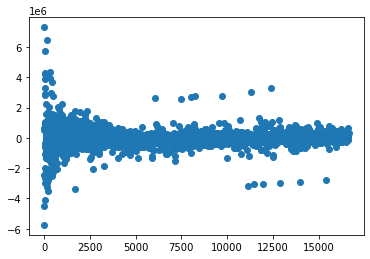

In [29]:
g=plt.plot(y_test - preds,marker='o',linestyle='')

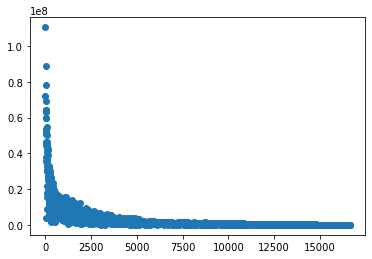

In [30]:
g=plt.plot(y_test,marker='o',linestyle='')

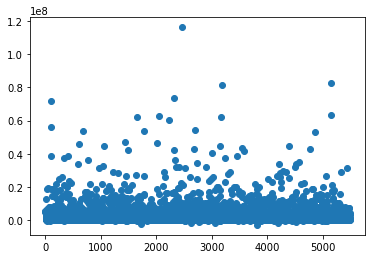

In [31]:
g=plt.plot(preds,marker='o',linestyle='')